In [28]:
import numpy as np
np.set_printoptions(precision=3)
np.random.seed(20221110)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

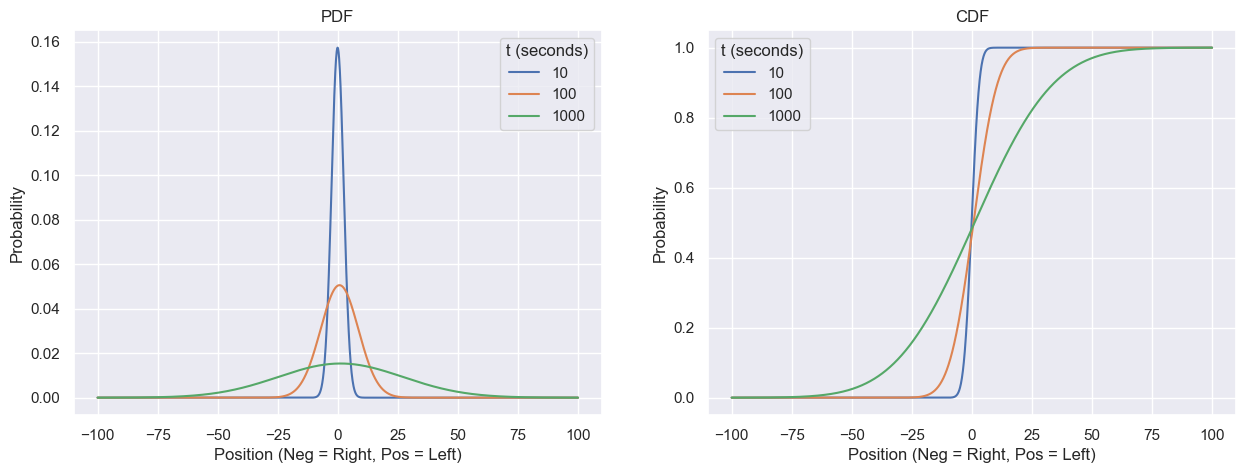

In [38]:
# List of values t, number of steps for our random walker to take
times = [10,100,1000]

# Define two subplots that will be pdf and cdf
fig, (pdf, cdf) = plt.subplots(1, 2, figsize=(15, 5))

# Loop through our list of t values
for r in times:
    Nruns=1000 # Run each walk 1000 times for accuracy
    Nsteps=r
    final_position=np.zeros(Nruns) # Reset final position each time loop occurs 
    # 1000 walks
    for j in range(Nruns):
        position=np.zeros(Nsteps)
        position[0]=0.0
        # Single walk
        for i in range(Nsteps):
            if np.random.random()<(1/3): # 1/3 chance to step left
                position[i]=position[i-1]+1
            elif np.random.random() > 0.5: # 1/3 chance to step right
                position[i]=position[i-1]-1
            else:                         # 1/3 chance to stand still
                position[i]=position[i-1] 
        final_position[j]=position[Nsteps-1] # Get the position once walk is completed
        
    # Get stats and create x axis frame
    avrg=np.mean(final_position)
    sd=np.std(final_position)
    x=np.linspace(-100,100,2000)
    
    # Plot PDF with y=pdf equation
    y=np.exp(-0.5*(x-avrg)**2/sd**2)/(sd*np.sqrt(2*np.pi))
    pdf.plot(x,y, label=r)
    # Label plot
    pdf.set_title('PDF')
    pdf.set_xlabel('Position (Neg = Right, Pos = Left)')
    pdf.set_ylabel('Probability')
    pdf.legend(title = 't (seconds)')
    
    # Plot CDF with y=CDF equation
    y = y.cumsum()
    y /= y[-1]
    cdf.plot(x,y, label=r)
    # Label plot
    cdf.set_title('CDF')
    cdf.set_xlabel('Position (Neg = Right, Pos = Left)')
    cdf.set_ylabel('Probability')
    cdf.legend(title = 't (seconds)')

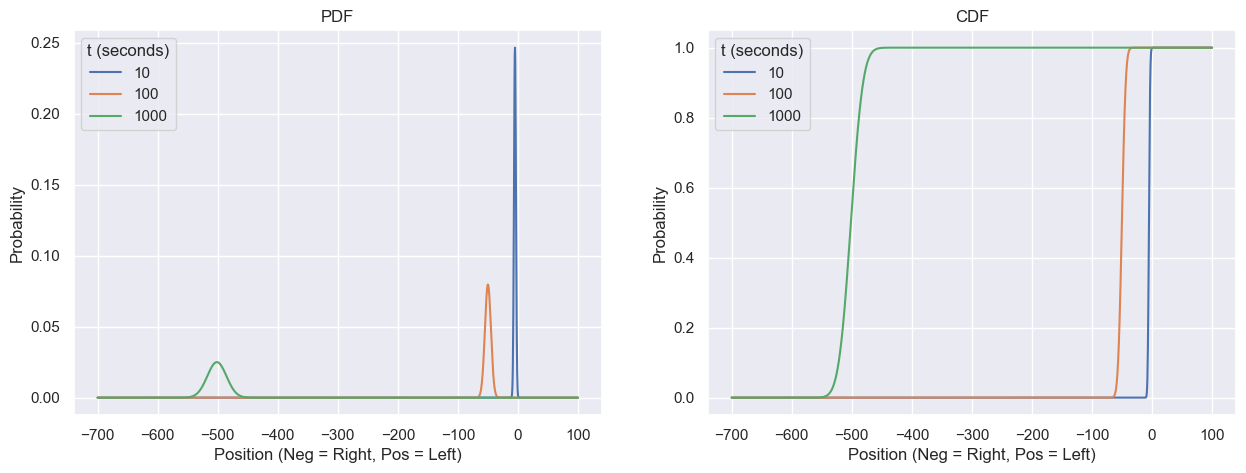

In [39]:
# List of values t, number of steps for our random walker to take
times = [10,100,1000]

# Define two subplots that will be pdf and cdf
fig, (pdf, cdf) = plt.subplots(1, 2, figsize = (15,5))

# Loop through our list of t values
for r in times:
    Nruns=1000 # Run each walk 1000 times for accuracy
    Nsteps=r
    final_position=np.zeros(Nruns) # Reset final position each time loop occurs
    # 1000 walks
    for j in range(Nruns):
        position=np.zeros(Nsteps)
        position[0]=0.0
        # Single walk
        for i in range(Nsteps):
            if np.random.random() > 0.5:  # 50% chance to stay still
                position[i]=position[i-1]
            else:                         # 50% chance to move right
                position[i]=position[i-1]-1
        final_position[j]=position[Nsteps-1] # Get position once walk is completed
   
    # Get stats and create x axis frame
    avrg=np.mean(final_position)
    sd=np.std(final_position)
    x=np.linspace(-700,100,2000)
    
    # Plot PDF with y=pdf equation
    y=np.exp(-0.5*(x-avrg)**2/sd**2)/(sd*np.sqrt(2*np.pi))
    pdf.plot(x,y, label=r)
    # Label plot
    pdf.set_title('PDF')
    pdf.set_xlabel('Position (Neg = Right, Pos = Left)')
    pdf.set_ylabel('Probability')
    pdf.legend(title = 't (seconds)')
    
    # Plot CDF with y=cdf equation
    y = y.cumsum()
    y /= y[-1]
    cdf.plot(x,y, label=r)
    # Label plot
    cdf.set_title('CDF')
    cdf.set_xlabel('Position (Neg = Right, Pos = Left)')
    cdf.set_ylabel('Probability')
    cdf.legend(title = 't (seconds)')

These plots look different due to the difference in probabilities assigned to stepping left, right, or staying still. In the first set of plots, even probabilities are given for the three options. This results in the position at the end of the walk being centered around 0, since the left (position + 1) and right (position - 1) steps should cancel each other out, particularly for longer walks like 100 or 1000 steps. In the second set of plots, even probabilities are given for staying still or moving right, but the probability of moving left is 0. Therefore, in this plot, the walker will never move left (positive x-values), and the mean will be centered around -(t/2), where t is seconds and thus the number of steps taken. This is because the walker will move right (position - 1) half the time, and the other half will not move (position + 0).